<a href="https://colab.research.google.com/github/WambuiJG/WambuiJG/blob/main/Math_480_Project_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing packages

import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#upload and read data
#data: https://drive.google.com/file/d/1SVN2N3jtiMrNOv9FesdUwOl1qgm0R_mp/view?usp=sharing
df = pd.read_csv('/content/Mall_Customers.csv') # Changed pd.read to pd.read_csv
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Performing exploratory data analysis

#Finding the number of null values in the dataframe i.e. checking for missing values
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#scatter plot
from seaborn import scatterplot
female_customers = df[df['Gender'] == 'Female']
male_customers = df[df['Gender'] == 'Male']

scatterplot(x=female_customers['Age'], y=df ['Spending Score (1-100)'])
plt.xlabel("Female Customers' Age")
plt.ylabel('Spending Score')
plt.title("Scatter Plot of Female Customers' Age against Spending Score")
plt.show()


NameError: name 'df' is not defined

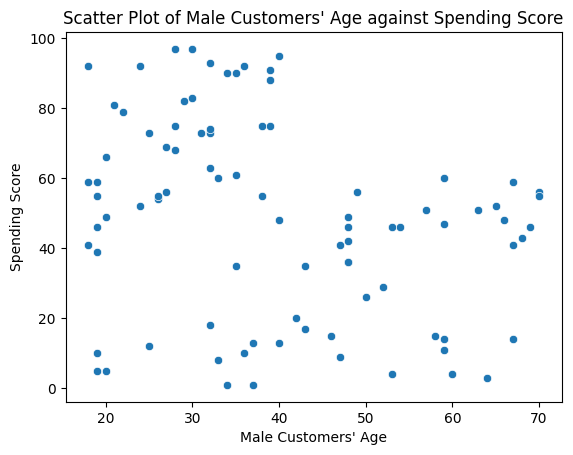

In [ ]:
#scatter plot
from seaborn import scatterplot
scatterplot(x=male_customers['Age'], y=df ['Spending Score (1-100)'])
plt.xlabel("Male Customers' Age")
plt.ylabel('Spending Score')
plt.title("Scatter Plot of Male Customers' Age against Spending Score")
plt.show()

In [ ]:
#Finding the appropriate number of clusters

#I am calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster
x = female_customers[["Age", "Spending Score (1-100)"]]
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for K-Means Clustering of Female Customers ')
plt.show()

NameError: name 'female_customers' is not defined

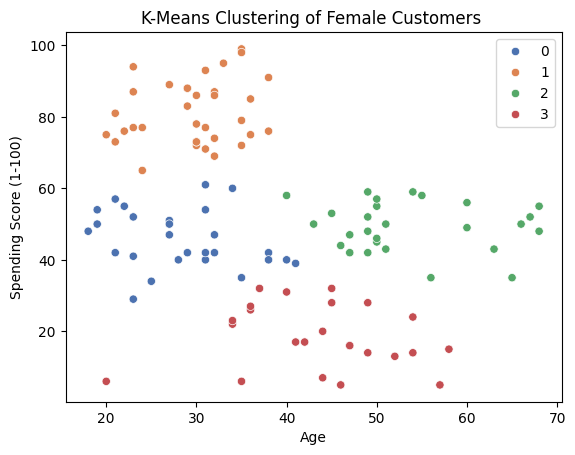

In [ ]:
#Create a KMeans to cluster the data into 4 groups
kmeans = KMeans(n_clusters = 4)

#Fit the KMeans model to the data 'x'

clust = kmeans.fit(x)
cl = kmeans.labels_

#Create a scatterplot
scatterplot(x=female_customers["Age"],y=female_customers["Spending Score (1-100)"], hue=cl, palette="deep")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Female Customers ')
plt.show()

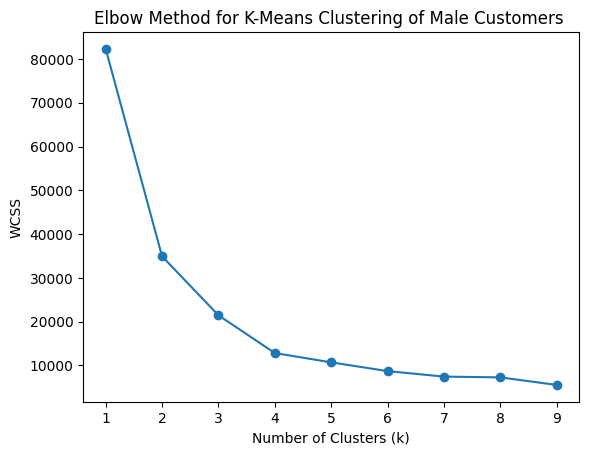

In [ ]:
#Finding the appropriate number of clusters

#I am calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster
y = male_customers[["Age", "Spending Score (1-100)"]]
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for K-Means Clustering of Male Customers ')
plt.show()

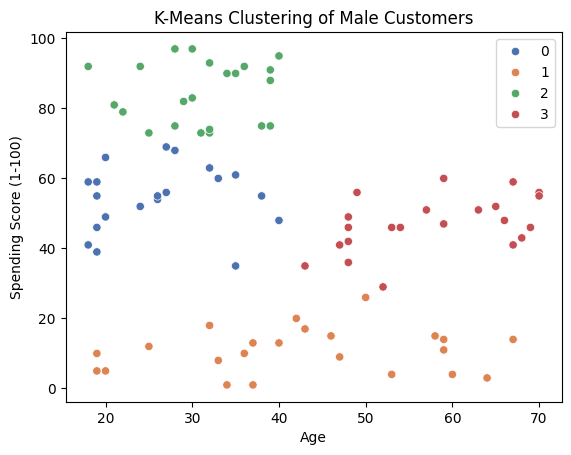

In [ ]:
#Create a KMeans to cluster the data into 4 groups
kmeans = KMeans(n_clusters = 4)

#Fit the KMeans model to the data 'x'

clust = kmeans.fit(y)
cl = kmeans.labels_

#Create a scatterplot
scatterplot(x=male_customers["Age"],y=male_customers["Spending Score (1-100)"], hue=cl, palette="deep")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Male Customers')
plt.show()

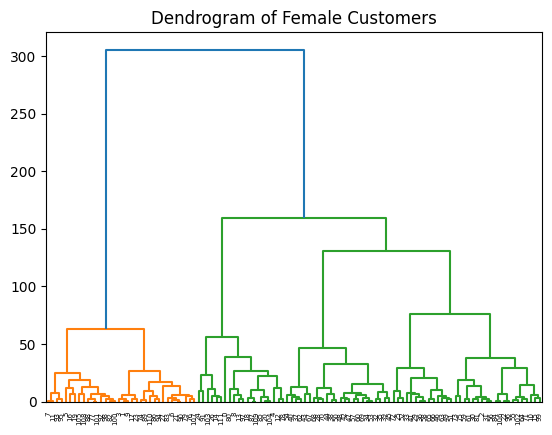

In [ ]:
#creating a dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(female_customers[['Age', 'Spending Score (1-100)']], method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.title('Dendrogram of Female Customers')
plt.show()

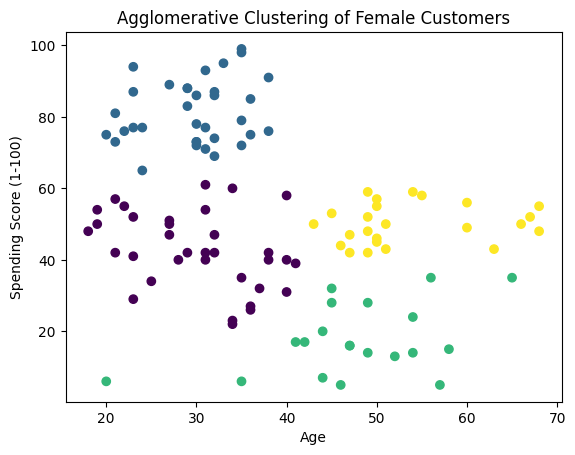

In [ ]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(female_customers[['Age', 'Spending Score (1-100)']])

plt.scatter(female_customers['Age'], female_customers['Spending Score (1-100)'], c=labels)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering of Female Customers')
plt.show()

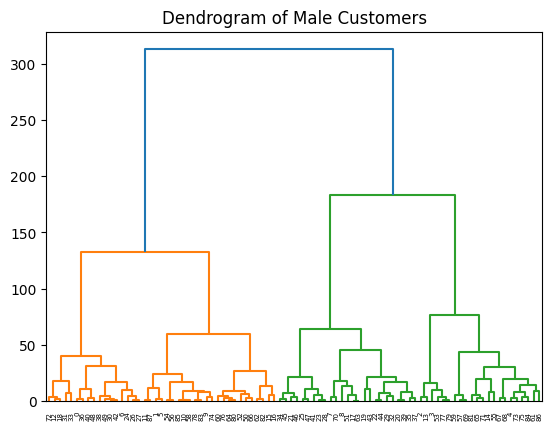

In [ ]:
#creating a dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(male_customers[['Age', 'Spending Score (1-100)']], method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.title('Dendrogram of Male Customers')
plt.show()

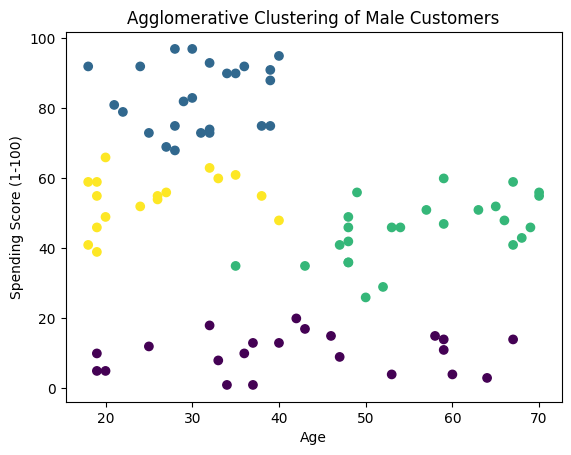

In [ ]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(male_customers[['Age', 'Spending Score (1-100)']])

plt.scatter(male_customers['Age'], male_customers['Spending Score (1-100)'], c=labels)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering of Male Customers')
plt.show()